In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import sklearn.linear_model as skl_lm
import sklearn.discriminant_analysis as skl_da
import sklearn.neighbors as skl_nb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [62]:
train_data = pd.read_csv('data/training_data_fall2024.csv')

#### Exploratory Analysis

In [63]:
train_data.tail()

,hour_of_day,day_of_week,month,holiday,weekday,summertime,temp,dew,humidity,precip,snow,snowdepth,windspeed,cloudcover,visibility,increase_stock
1595,3,5,6,0,0,1,21.5,19.4,87.68,0.000,0,0.0,10.6,24.4,16.0,low_bike_demand
1596,14,0,6,0,1,1,23.2,20.1,82.43,2.217,0,0.0,9.8,92.1,10.4,low_bike_demand
1597,13,0,3,0,1,1,13.9,-2.2,32.93,0.000,0,2.0,18.2,79.3,16.0,low_bike_demand
1598,14,5,3,0,0,1,11.7,-9.3,22.09,0.000,0,0.0,5.8,24.4,16.0,high_bike_demand
1599,22,6,2,0,0,0,4.2,1.7,84.11,1.081,0,0.0,21.9,97.4,16.0,low_bike_demand


In [64]:
X = train_data.copy()
y = X.pop('increase_stock')

In [65]:
cat_features = ['hour_of_day', 'day_of_week', 'month', 'holiday', 'weekday', 'summertime', 'snow']

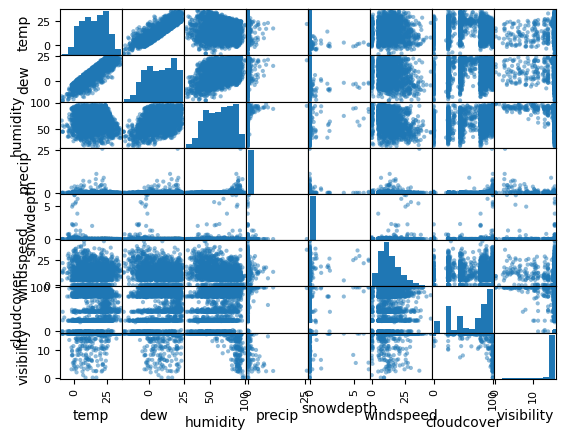

In [66]:
pd.plotting.scatter_matrix(X.drop(columns=cat_features));

## 1) Logistic Regression

Defining Logistic Regression function

In [4]:
# Logistic Regression model with one-hot encoding
def logistic_regression(X, y, test_size=0.2, cat_features=None):
# One-hot encode categorical features
    X = pd.get_dummies(X, columns=cat_features)

    # Split the data into test (0.8) and train (0.2)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=0)

    # Load and fit the model
    logr_model = skl_lm.LogisticRegression(max_iter=5000)
    logr_model.fit(X_train, y_train)

    # Compute predictions
    y_pred = logr_model.predict(X_test)

    # Compute the metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred) # Proportion of 'low_bike_demand' (0) that were correctly predicted
    recall = recall_score(y_test, y_pred) # Proportion of 'high_bike_demand' (1) that were correctly predicted
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"Logistic Regression Model \n")
    print(f"Accuracy: {round(accuracy, 4)}")
    print(f'Precision: {round(precision, 4)}')
    print(f'Recall: {round(recall, 4)}')
    print(f'Confusion Matrix: \n{conf_matrix}')

Implementing Logistic Regression model

In [5]:
# Load the data
train_data = pd.read_csv('data/training_data_fall2024.csv')

# Transform label into 0 (low_bike_demand) and 1 (high_bike_demand)
train_data['increase_stock'] = np.where(train_data['increase_stock'] == 'low_bike_demand', 0, 1)

# Split data into X and y
X = train_data.copy()
y = X.pop('increase_stock')

# List with categorical features
cat_features = ['hour_of_day', 'day_of_week', 'month', 'holiday', 'weekday', 'summertime', 'snow']

# Run Logistic Regression
logistic_regression(X, y, test_size=0.3, cat_features=cat_features)

Logistic Regression Model 

Accuracy: 0.875
Precision: 0.6765
Recall: 0.5476
Confusion Matrix: 
[[374  22]
 [ 38  46]]


Adding a day/night column

In [6]:
# Load the data
train_data = pd.read_csv('data/training_data_fall2024.csv')

# Transform label into 0 (low_bike_demand) and 1 (high_bike_demand)
train_data['increase_stock'] = np.where(train_data['increase_stock'] == 'low_bike_demand', 0, 1)

# Add column to the data to indicate if it is day (1) or night (0), considering day from 6:00 to 18:00h
# Proposal: Adapt it to summertime and wintertime
train_data['day_night'] = np.where((train_data['hour_of_day'] >= 6) & (train_data['hour_of_day'] <= 18), 1, 0)

# Split data into X and y
X = train_data.copy()
y = X.pop('increase_stock')

# List with categorical features
cat_features = ['hour_of_day', 'day_of_week', 'month', 'holiday', 'weekday', 'summertime', 'snow', 'day_night']

# Run Logistic Regression
logistic_regression(X, y, test_size=0.3, cat_features=cat_features)

Logistic Regression Model 

Accuracy: 0.8854
Precision: 0.7042
Recall: 0.5952
Confusion Matrix: 
[[375  21]
 [ 34  50]]


## 2) Linear Discriminant Analysis

Defining LDA function

In [137]:
# Linear Discriminant Analysis model with one-hot encoding
def LDA(X, y, test_size=0.2, cat_features=None):
    # One-hot encode categorical features
    X = pd.get_dummies(X, columns=cat_features)

    # Split the data into test (0.8) and train (0.2)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=0)

    # Load and fit the model
    lda_model = skl_da.LinearDiscriminantAnalysis()
    lda_model.fit(X_train, y_train)

    # Compute predictions
    y_pred = lda_model.predict(X_test)

    # Compute the metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred) # Proportion of 'low_bike_demand' (0) that were correctly predicted
    recall = recall_score(y_test, y_pred) # Proportion of 'high_bike_demand' (1) that were correctly predicted
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"Linear Discriminant Analysis Model \n")
    print(f"Accuracy: {round(accuracy, 4)}")
    print(f'Precision: {round(precision, 4)}')
    print(f'Recall: {round(recall, 4)}')
    print(f'Confusion Matrix: \n{conf_matrix}')

Implementing LDA model

In [138]:
# Load the data
train_data = pd.read_csv('data/training_data_fall2024.csv')

# Transform label into 0 (low_bike_demand) and 1 (high_bike_demand)
train_data['increase_stock'] = np.where(train_data['increase_stock'] == 'low_bike_demand', 0, 1)

# Split data into X and y
X = train_data.copy()
y = X.pop('increase_stock')

# List with categorical features
cat_features = ['hour_of_day', 'day_of_week', 'month', 'holiday', 'weekday', 'summertime', 'snow']

# Run LDA
LDA(X, y, test_size=0.3, cat_features=cat_features)

Linear Discriminant Analysis Model 

Accuracy: 0.8542
Precision: 0.5854
Recall: 0.5714
Confusion Matrix: 
[[362  34]
 [ 36  48]]


Adding a day/night column

In [140]:
# Load the data
train_data = pd.read_csv('data/training_data_fall2024.csv')

# Transform label into 0 (low_bike_demand) and 1 (high_bike_demand)
train_data['increase_stock'] = np.where(train_data['increase_stock'] == 'low_bike_demand', 0, 1)

# Add column to the data to indicate if it is day (1) or night (0), considering day from 6:00 to 18:00h
# Proposal: Adapt it to summertime and wintertime
train_data['day_night'] = np.where((train_data['hour_of_day'] >= 6) & (train_data['hour_of_day'] <= 18), 1, 0)

# Split data into X and y
X = train_data.copy()
y = X.pop('increase_stock')

# List with categorical features
cat_features = ['hour_of_day', 'day_of_week', 'month', 'holiday', 'weekday', 'summertime', 'snow', 'day_night']

# Run LDA
LDA(X, y, test_size=0.3, cat_features=cat_features)

Linear Discriminant Analysis Model 

Accuracy: 0.8542
Precision: 0.5854
Recall: 0.5714
Confusion Matrix: 
[[362  34]
 [ 36  48]]


## 3) Quadratic Discriminant Analysis

Defining QDA function

In [160]:
# Quadratic Discriminant Analysis model
def QDA(X, y, test_size=0.2, cat_features=None):
    # One-hot encode categorical features
    X = pd.get_dummies(X, columns=cat_features)

    # Split the data into test (0.8) and train (0.2)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=0)

    # Load and fit the model
    qda_model = skl_da.QuadraticDiscriminantAnalysis()
    qda_model.fit(X_train, y_train)

    # Compute predictions
    y_pred = qda_model.predict(X_test)

    # Compute the metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred) # Proportion of 'low_bike_demand' (0) that were correctly predicted
    recall = recall_score(y_test, y_pred) # Proportion of 'high_bike_demand' (1) that were correctly predicted
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"k Quadratic Discriminant Analysis Model \n")
    print(f"Accuracy: {round(accuracy, 4)}")
    print(f'Precision: {round(precision, 4)}')
    print(f'Recall: {round(recall, 4)}')
    print(f'Confusion Matrix: \n{conf_matrix}')

Implementing QDA model

In [164]:
# Load the data
train_data = pd.read_csv('data/training_data_fall2024.csv')

# Transform label into 0 (low_bike_demand) and 1 (high_bike_demand)
train_data['increase_stock'] = np.where(train_data['increase_stock'] == 'low_bike_demand', 0, 1)

# Split data into X and y
X = train_data.copy()
y = X.pop('increase_stock')

# List with categorical features
cat_features = ['hour_of_day', 'day_of_week', 'month', 'holiday', 'weekday', 'summertime', 'snow']

# Run QDA
QDA(X, y, test_size=0.3, cat_features=cat_features)

k Quadratic Discriminant Analysis Model 

Accuracy: 0.5979
Precision: 0.3018
Recall: 0.9881
Confusion Matrix: 
[[204 192]
 [  1  83]]


C:\Users\abarg\AppData\Roaming\Python\Python311\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Adding day/night column

In [162]:
# Load the data
train_data = pd.read_csv('data/training_data_fall2024.csv')

# Transform label into 0 (low_bike_demand) and 1 (high_bike_demand)
train_data['increase_stock'] = np.where(train_data['increase_stock'] == 'low_bike_demand', 0, 1)

# Add column to the data to indicate if it is day (1) or night (0), considering day from 6:00 to 18:00h
# Proposal: Adapt it to summertime and wintertime
train_data['day_night'] = np.where((train_data['hour_of_day'] >= 6) & (train_data['hour_of_day'] <= 18), 1, 0)

# Split data into X and y
X = train_data.copy()
y = X.pop('increase_stock')

# List with categorical features
cat_features = ['hour_of_day', 'day_of_week', 'month', 'holiday', 'weekday', 'summertime', 'snow', 'day_night']

# Run QDA
QDA(X, y, test_size=0.3, cat_features=cat_features)

k Quadratic Discriminant Analysis Model 

Accuracy: 0.5979
Precision: 0.3018
Recall: 0.9881
Confusion Matrix: 
[[204 192]
 [  1  83]]


C:\Users\abarg\AppData\Roaming\Python\Python311\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


## 4) k Nearest Neighbors

Defining k-NN function

In [ ]:
# k Nearest Neighbors model
def kNN(X, y, n_neighbors=1, test_size=0.2, cat_features=None):
    # One-hot encode categorical features
    X = pd.get_dummies(X, columns=cat_features)

    # Split the data into test (0.8) and train (0.2)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=0)

    # Load and fit the model
    knn_model = skl_nb.KNeighborsClassifier(n_neighbors=n_neighbors)
    knn_model.fit(X_train, y_train)

    # Compute predictions
    y_pred = knn_model.predict(X_test)

    # Compute the metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred) # Proportion of 'low_bike_demand' (0) that were correctly predicted
    recall = recall_score(y_test, y_pred) # Proportion of 'high_bike_demand' (1) that were correctly predicted
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"k Nearest Neighbors Model \n")
    print(f"Accuracy: {round(accuracy, 4)}")
    print(f'Precision: {round(precision, 4)}')
    print(f'Recall: {round(recall, 4)}')
    print(f'Confusion Matrix: \n{conf_matrix}')

Defining a k-value comparator

In [156]:
def knn_comparator(X, y, n_neighbors, test_size=0.2, cat_features=None):
    # One-hot encode categorical features
    X = pd.get_dummies(X, columns=cat_features)

    # Split the data into test and train
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=0)

    accuracies = {}
    for k in range(1, n_neighbors+1):
        # Load and fit the KNN model
        knn_model = skl_nb.KNeighborsClassifier(n_neighbors=k)
        knn_model.fit(X_train, y_train)

        # Compute predictions
        y_pred = knn_model.predict(X_test)

        # Fraction of correct predictions
        accuracy = accuracy_score(y_test, y_pred)
        
        # Add value to the accuracies dictionary
        accuracies[k] = accuracy
    
    print(f"Max accuracy {round(max(accuracies.values()), 4)} at k={max(accuracies, key=accuracies.get)}")

    # Plot models accuracy for each value of k
    plt.scatter(accuracies.keys(), accuracies.values())
    plt.xlabel("Number of neighbors (k)")
    plt.ylabel("Accuracy")
    plt.title("Accuracy of k-NN model")
    plt.xlim([1, n_neighbors])
    plt.text(max(accuracies, key=accuracies.get), round(max(accuracies.values()), 4), f"k={max(accuracies, key=accuracies.get)}")
    plt.show();

Searching for the optimal k-value

Max accuracy 0.85 at k=29


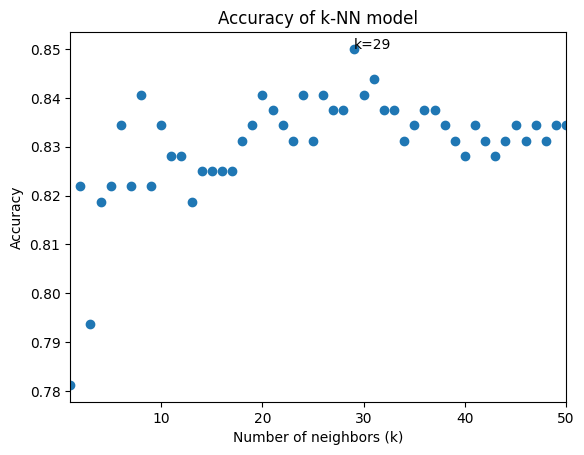

In [157]:
cat_features = ['hour_of_day', 'day_of_week', 'month', 'holiday', 'weekday', 'summertime', 'snow']
knn_comparator(X, y, n_neighbors=50, test_size=0.2, cat_features=None)

Implementing k-NN model

In [ ]:
# Load the data
train_data = pd.read_csv('data/training_data_fall2024.csv')

# Transform label into 0 (low_bike_demand) and 1 (high_bike_demand)
train_data['increase_stock'] = np.where(train_data['increase_stock'] == 'low_bike_demand', 0, 1)

# Split data into X and y
X = train_data.copy()
y = X.pop('increase_stock')

# List with categorical features
cat_features = ['hour_of_day', 'day_of_week', 'month', 'holiday', 'weekday', 'summertime', 'snow']

# Run kNN
kNN(X, y, n_neighbors=29, test_size=0.2, cat_features=None)

k Nearest Neighbors Model 

Accuracy: 0.85
Precision: 0.6136
Recall: 0.4655
Confusion Matrix: 
[[245  17]
 [ 31  27]]


Adding a day/night column

In [ ]:
# Load the data
train_data = pd.read_csv('data/training_data_fall2024.csv')

# Transform label into 0 (low_bike_demand) and 1 (high_bike_demand)
train_data['increase_stock'] = np.where(train_data['increase_stock'] == 'low_bike_demand', 0, 1)

# Add column to the data to indicate if it is day (1) or night (0), considering day from 6:00 to 18:00h
# Proposal: Adapt it to summertime and wintertime
train_data['day_night'] = np.where((train_data['hour_of_day'] >= 6) & (train_data['hour_of_day'] <= 18), 1, 0)

# Split data into X and y
X = train_data.copy()
y = X.pop('increase_stock')

# List with categorical features
cat_features = ['hour_of_day', 'day_of_week', 'month', 'holiday', 'weekday', 'summertime', 'snow', 'day_night']

# Run kNN
kNN(X, y, n_neighbors=29, test_size=0.2, cat_features=None)

k Nearest Neighbors Model 

Accuracy: 0.85
Precision: 0.6136
Recall: 0.4655
Confusion Matrix: 
[[245  17]
 [ 31  27]]
